# Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị

## 1. Giới thiệu chung
Tập dữ liệu được thu thập từ hệ thống bán lẻ trực tuyến của một công ty tại Anh Quốc, ghi nhận các giao dịch mua bán từ tháng 12 năm 2010 đến tháng 12 năm 2011. Dữ liệu phản ánh hoạt động thực tế của khách hàng tại siêu thị trực tuyến, trên nhiều quốc gia khác nhau.

## 2. Mục tiêu
- Thực hiện phân tích khám phá dữ liệu (EDA) để hiểu rõ cấu trúc và đặc điểm của các trường dữ liệu.
- Trực quan hóa dữ liệu thông qua biểu đồ phân bố, heatmap, boxplot, và pairplot.
- Xu hướng mua sắm của khách hàng theo thời gian, quốc gia, sản phẩm.

## 3. Thông tin về dữ liệu 
- 541909 mẫu dữ liệu
- 8 biến (features)

|Biến|Mô tả|
|---------|--------|
|CustomerID| Mã khách hàng|
|InvoiceNo| Số hóa đơn|
|StockCode| Mã sản phẩm|
|Description| Mô tả sản phẩm|
|Quantity| Số lượng bán|
|UnitPrice| Giá bán|
|InvoiceDate| Ngày giao dịch|
|Country| Quốc gia khách hàng|

## 4. Nạp và xem trước dữ liệu

### Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu

In [3]:
data = pd.read_csv("Online Retail.csv")
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Một số thông tin cơ bản của dữ liệu

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Nhận xét:**
- Tập dữ liệu gồm 541,909 dòng và 8 cột.
- Các cột bao gồm: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country.
- Có giá trị bị thiếu ở cột Description (1454 giá trị bị thiếu) và đặc biệt là CustomerID (135080 giá trị bị thiếu).
- Các kiểu dữ liệu:
    - object: cho thông tin dạng chuỗi (mã hàng, mô tả, quốc gia,...).
    - int64 và float64: cho dữ liệu số (Quantity, UnitPrice, CustomerID).

## 5. Tiền xử lý dữ liệu

### Xử lý giá trị bị thiếu

In [8]:
missing = data.isnull().sum().reset_index()
missing.columns = ['Cột', 'Số lượng thiếu']
missing['Tỷ lệ thiếu (%)'] = (missing['Số lượng thiếu'] / len(data) * 100).round(2)
print("Tóm tắt giá trị bị thiếu:")
display(missing)

Tóm tắt giá trị bị thiếu:


,Cột,Số lượng thiếu,Tỷ lệ thiếu (%)
0,InvoiceNo,0,0.00
1,StockCode,0,0.00
2,Description,1454,0.27
3,Quantity,0,0.00
4,InvoiceDate,0,0.00
5,UnitPrice,0,0.00
6,CustomerID,135080,24.93
7,Country,0,0.00


**Cột Description**
- Vì đây là mô tả sản phẩm (text), nếu thiếu thì dòng đó không thể dùng được → Giải pháp: Xóa dòng đó.

**Cột CustomerID**
- Mã khách hàng bị thiếu có thể là giao dịch không xác định người mua → Giải pháp: Xóa luôn để đảm bảo tính chính xác.

In [9]:
data = data.dropna(subset=['Description', 'CustomerID'])

### Xử lý giá trị bị lỗi hoặc không hợp lệ
Một số hóa đơn có giá trị âm hoặc bằng 0 nên giải pháp hợp lý nhất là bỏ luôn dòng dữ liệu đó

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Loại bỏ các dòng có Quantity <= 0 hoặc UnitPrice <= 0
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Giá trị trùng lặp

In [12]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397884, dtype: bool

**Dữ liệu không có giá trị trùng lặp**

### Chuyển đổi dữ liệu
- InvoiceDate nên được chuyển sang kiểu datetime.
- CustomerID có thể đổi sang kiểu int để dễ xử lý.

### Kiểm tra lại sau khi làm sạch 

In [13]:
print("Kích thước dữ liệu sau xử lý:", data.shape)
print("\nKiểm tra lại giá trị bị thiếu:")
print(data.isnull().sum())

Kích thước dữ liệu sau xử lý: (397884, 8)

Kiểm tra lại giá trị bị thiếu:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## 6. Phân tích mô tả

### Phân bố các biến số

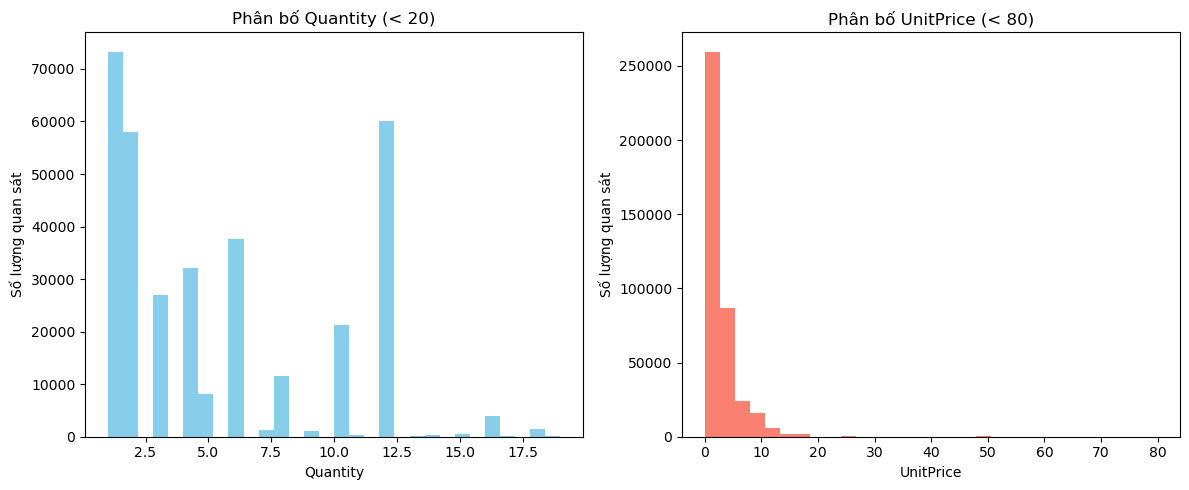

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data[data['Quantity'] < 20]['Quantity'], bins=30, color='skyblue')
plt.title('Phân bố Quantity (< 20)')
plt.xlabel('Quantity')
plt.ylabel('Số lượng quan sát')

plt.subplot(1,2,2)
plt.hist(data[data['UnitPrice'] < 80]['UnitPrice'], bins=30, color='salmon')
plt.title('Phân bố UnitPrice (< 80)')
plt.xlabel('UnitPrice')
plt.ylabel('Số lượng quan sát')

plt.tight_layout()
plt.show()


### Thống kê tổng quan doanh thu

In [15]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['TotalPrice'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

In [17]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
